In [12]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

load_dotenv() 
HOST = os.getenv("HOST")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
DATABASE = os.getenv("DATABASE")

# Connexion 
host = HOST
user = USER
password = PASSWORD
database = DATABASE
port = 3306


In [8]:

# Crée une "engine" SQLAlchemy
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [10]:
# Lire une table complète
df = pd.read_sql("SELECT * FROM questions", con=engine)

# Afficher les 5 premières lignes
df.head()


,id,title,link,excerpt,tags,author,pub_date
0,1,Error：Could not locate SurfaceTextureWrapper.s...,https://stackoverflow.com/questions/79727096/e...,I want to upgrade Flutter from 3.19.2 to 3.22 ...,"java,android,flutter",zx l,None
1,2,"google-chrome-stable on debian dbus error, but...",https://stackoverflow.com/questions/79727095/g...,I am running a Docker container with Debian 11...,"debian,google-chrome-headless",MDickten,None
2,3,Postgres container password authentication fai...,https://stackoverflow.com/questions/79727094/p...,I am building a microservices application usin...,"postgresql,spring-boot,docker-compose",UlugbekToshmatov,None
3,4,Fixed size mpu ad loading fails on ioS for flu...,https://stackoverflow.com/questions/79727092/f...,I have a flutter application in which I have i...,"ios,flutter,ads,gam",Hassan Imtiaz,None
4,5,InlineObjects are not generated after Java upg...,https://stackoverflow.com/questions/79727088/i...,I am migrating my API from Java 11 to Java 17 ...,"java,openapi,openapi-generator-maven-plugin",sharonm,None


## Création d'un nuage de mot

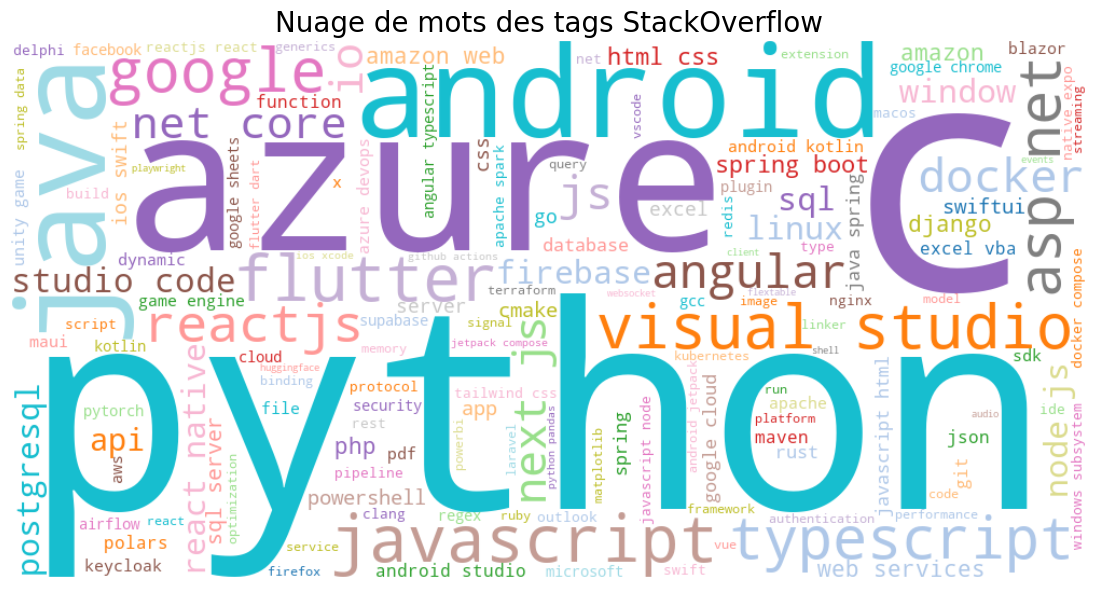

In [18]:
all_tags = []

for tags in df["tags"].dropna():
    tag_list = tags.split(",")
    all_tags.extend(tag.strip() for tag in tag_list)

# Étape 2 : Joindre tous les tags en une seule chaîne pour le WordCloud
tags_text = " ".join(all_tags)

# Étape 3 : Créer le nuage de mots
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="tab20",
    max_words=150
).generate(tags_text)

# Étape 4 : Afficher
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des tags StackOverflow", fontsize=20)
plt.show()